In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.datasets import fetch_california_housing
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import missingno as msno
import sklearn.covariance as covar
import seaborn as sns

In [15]:
df=pd.DataFrame(fetch_california_housing(as_frame=True)["frame"])
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [16]:
msno.bar(df)

<AxesSubplot:>

RuntimeError: In set_size: Could not set the fontsize (error code 0x97)

<Figure size 50x20 with 3 Axes>

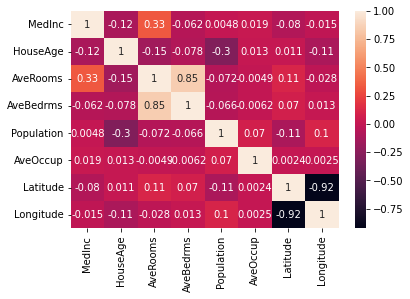

In [ ]:

sns.heatmap(df.iloc[:,:-1].corr(),annot=True)
# df2=df.drop(columns='Longitude')
df2=df

In [ ]:
polF=PolynomialFeatures(2)
df3=pd.DataFrame(polF.fit_transform(df2.iloc[:,:-1]))

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(df3.iloc[:,:],df.iloc[:,-1],test_size=0.20, random_state=44)

In [ ]:
X_train

0       1     2          3         4       5         6      7   \
5567   1.0  2.6618  19.0   4.666667  1.142132  2047.0  3.463621  33.88   
3116   1.0  3.9261  12.0   5.657303  1.044944  1027.0  2.884831  35.63   
4750   1.0  2.5320  39.0   3.734257  1.022670  2638.0  3.322418  34.04   
13963  1.0  3.9688  15.0  16.550562  3.078652   622.0  2.329588  34.24   
2262   1.0  1.9575  24.0   4.528424  1.058140  2098.0  2.710594  36.79   
...    ...     ...   ...        ...       ...     ...       ...    ...   
18528  1.0  3.2437  44.0   4.996139  1.038610   645.0  2.490347  36.96   
20355  1.0  1.9811  16.0   6.104730  1.168919   587.0  1.983108  34.19   
16955  1.0  6.0000  40.0   5.990196  1.006536   751.0  2.454248  37.53   
3491   1.0  5.1408  33.0   5.359862  0.913495   881.0  3.048443  34.27   
14100  1.0  1.5517  31.0   3.110831  0.974811   816.0  2.055416  32.76   

           8          9   ...         35           36        37         38  \
5567  -118.28   7.085179  ...  4190209.0  7090.032149  69352.36 -242119.16   
3116  -117.76  15.414261  ...  1054729.0  2962.721910  36592.01 -120939.52   
4750  -118.32   6.411024  ...  6959044.0  8764.539043  89797.52 -312128.16   
13963 -116.87  15.751373  ...   386884.0  1449.003745  21297.28  -72693.14   
2262  -119.83   3.831806  ...  4401604.0  5686.826873  77185.42 -251403.34   
...       ...        ...  ...        ...          ...       ...        ...   
18528 -122.04  10.521590  ...   416025.0  1606.274131  23839.20  -78715.80   
20355 -118.96   3.924757  ...   344569.0  1164.084459  20069.53  -69829.52   
16955 -122.30  36.000000  ...   564001.0  1843.140523  28185.03  -91847.30   
3491  -118.47  26.427825  ...   776161.0  2685.678201  30191.87 -104372.07   
14100 -117.09   2.407773  ...   665856.0  1677.219144  26732.16  -95545.44   

              39          40          41         42         43          44  
5567   11.996670  117.347479 -409.677090  1147.8544 -4007.3264  13990.1584  
3116    8.322253  102.786545 -339.717753  1269.4969 -4195.7888  13867.4176  
4750   11.038462  113.095113 -393.108514  1158.7216 -4027.6128  13999.6224  
13963   5.426980   79.765094 -272.258951  1172.3776 -4001.6288  13658.5969  
2262    7.347322   99.722765 -324.810517  1353.5041 -4408.5457  14359.2289  
...          ...         ...         ...        ...        ...         ...  
18528   6.201831   92.043243 -303.922008  1366.0416 -4510.5984  14893.7616  
20355   3.932718   67.802466 -235.910541  1168.9561 -4067.2424  14151.4816  
16955   6.023335   92.107941 -300.154575  1408.5009 -4589.9190  14957.2900  
3491    9.293004  104.470138 -361.149031  1174.4329 -4059.9669  14035.1409  
14100   4.224733   67.335416 -240.668615  1073.2176 -3835.8684  13710.0681  

[16512 rows x 45 columns]

In [ ]:
lm=linear_model.SGDRegressor()
lm.fit(X_train,y_train)
r2_score(lm.predict(X_test),y_test)


0.5270713859983767

In [ ]:
plt.scatter(lm.predict(X_test),y_test, color = "red",s=0.1)
# plt.plot(lm.predict(X_test),y_test, color = "green")
# plt.xlim(200,1000)
plt.rcParams['figure.dpi'] = 2
plt.rcParams['savefig.dpi'] = 2
plt.show()
